## UVOD 

V projektni nalogi sem analizirala podatke o letih z dveh pomembnih severovzhodnih italijanskih letališč v obdobju od novembra 2022 do marca 2023.

Letališči:
* Marco Polo, Benetke
* Orio al Serio, Bergamo

Let sem določila z naslednjimi parametri:
* destinacija in država
* letalska družba / *letalske družbe
* datum leta
* številka leta / *številke leta 
* čas leta

(*- nekatere lete opravlja več letalskih družb skupaj)

Pridobljene podatke sem statistično analizirala. Na podlagi rezultatov analize sem potrdila ali ovrgla svoje vnaprej postavljene delovne hipoteze.


## Hipoteze

Na začetku projektne naloge sem postavila naslednje delovne hipoteze:
* Več letov je v obdobju praznikov (zadnji teden leta 2022 in prvi teden 2023).
* Največje število letov po državah iz letališča Marco Polo je v Italijo.
* Največ letov iz beneškega letališča je v soboto.
* V soboto je največja razlika v številu letov med letališčema.
* Ryanair predstavlja več kot polovico vseh letov iz Bergama.
* Največ letov iz obeh letališč je v eno izmed italijanskih letališč.
* Benetke imajo več direktnih letov v Severno Ameriko.
* Svetovno nogometno prvenstvo je vplivalo na število letov v Katar.



# UVOZ PODATKOV 


In [117]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [118]:
podatki_venezia = pd.read_csv('D:\Analiza_podatkov_o_letih\\analiza_podatkov_o_letih\obdelani_podatki\\venezia.csv')
podatki_bergamo = pd.read_csv('D:\Analiza_podatkov_o_letih\\analiza_podatkov_o_letih\obdelani_podatki\\bergamo.csv')
podatki_dest_z_drzavami = pd.read_csv('D:\Analiza_podatkov_o_letih\\analiza_podatkov_o_letih\obdelani_podatki\\veneziabergamo.total.csv', sep=';')
letalske_druzbe = pd.read_csv('D:\Analiza_podatkov_o_letih\\analiza_podatkov_o_letih\obdelani_podatki\letalska_druzba.csv')


Osnovnim podatkom sem dodala teden, v katerem je bil opravljen let. Podatke o destinacijah pa sem združila s podatki o državah destinacij.

In [119]:
podatki_venezia['datum']= pd.to_datetime(podatki_venezia['datum'], dayfirst=True)
podatki_bergamo['datum']= pd.to_datetime(podatki_bergamo['datum'], dayfirst=True)

In [120]:
podatki_venezia['teden'] = podatki_venezia.datum.dt.strftime('%V')
podatki_bergamo['teden'] = podatki_bergamo.datum.dt.strftime('%V')

In [121]:
podatki_venezia

,id,destinacija,datum,dan,cas,teden
0,v1,Amman,2022-11-02,SRE,5:10,44
1,v2,Amman,2022-11-09,SRE,5:10,45
2,v3,Amman,2022-11-16,SRE,5:10,46
3,v4,Amman,2022-11-23,SRE,5:10,47
4,v5,Amman,2022-11-30,SRE,5:10,48
...,...,...,...,...,...,...
11775,v11776,Zurich,2023-03-18,SOB,1:20,11
11776,v11777,Zurich,2023-03-07,TOR,1:20,10
11777,v11778,Zurich,2023-03-14,TOR,1:20,11
11778,v11779,Zurich,2023-03-21,TOR,1:20,12


In [122]:
zdruzeni_benetke = pd.merge(podatki_venezia, podatki_dest_z_drzavami, on=['id', 'destinacija'])
zdruzeni_bergamo = pd.merge(podatki_bergamo, podatki_dest_z_drzavami, on=['id', 'destinacija'])

Začetni podatki:

In [123]:
zdruzeni_benetke

,id,destinacija,datum,dan,cas,teden,Airport,Država
0,v1,Amman,2022-11-02,SRE,5:10,44,Benetke,Jordanija
1,v2,Amman,2022-11-09,SRE,5:10,45,Benetke,Jordanija
2,v3,Amman,2022-11-16,SRE,5:10,46,Benetke,Jordanija
3,v4,Amman,2022-11-23,SRE,5:10,47,Benetke,Jordanija
4,v5,Amman,2022-11-30,SRE,5:10,48,Benetke,Jordanija
...,...,...,...,...,...,...,...,...
11775,v11776,Zurich,2023-03-18,SOB,1:20,11,Benetke,Švica
11776,v11777,Zurich,2023-03-07,TOR,1:20,10,Benetke,Švica
11777,v11778,Zurich,2023-03-14,TOR,1:20,11,Benetke,Švica
11778,v11779,Zurich,2023-03-21,TOR,1:20,12,Benetke,Švica


In [124]:
zdruzeni_bergamo 

,id,destinacija,datum,dan,cas,teden,Airport,Država
0,b1,Agadir,2022-11-01,TOR,2:40,44,Bergamo,Maroko
1,b2,Agadir,2022-11-05,SOB,2:40,44,Bergamo,Maroko
2,b3,Agadir,2022-11-08,TOR,2:40,45,Bergamo,Maroko
3,b4,Agadir,2022-11-12,SOB,3:40,45,Bergamo,Maroko
4,b5,Agadir,2022-11-15,TOR,3:40,46,Bergamo,Maroko
...,...,...,...,...,...,...,...,...
11367,b11368,Zaragoza,2023-03-20,PON,1:55,12,Bergamo,Španija
11368,b11369,Zaragoza,2023-03-24,PET,1:55,12,Bergamo,Španija
11369,b11370,Zaragoza,2023-03-26,NED,1:50,12,Bergamo,Španija
11370,b11371,Zaragoza,2023-03-28,TOR,1:50,13,Bergamo,Španija


## Primerjava števila letov med prazniki z ostalimi tedni
Zanimalo me je, ali je v času praznikov (zadnji teden leta 2022 in prvi teden 2023) več letov v primerjavi z ostalimi tedni za obe letališči. Analiza podatkov je pokazala, da je bilo v prazničnem obdobju za 15 % več letov z letišča Marco Polo, medtem ko je bilo z letališča Orio al Serio opravljenih le 0,8 % več letov. Lahko bi rekli, da je bilo v prazničnem obdobju opravljenih več letov le iz beneškega letališča.


In [125]:
value_counts_venice = podatki_venezia["teden"].value_counts()
zadnji_teden_ve = value_counts_venice["52"]
prvi_teden_ve = value_counts_venice["01"]
povprecje_dveh_ve =(prvi_teden_ve + zadnji_teden_ve)//2
podatki_filtered_ve = podatki_venezia[(podatki_venezia["teden"] != "52") & (podatki_venezia["teden"] != "01")]
preostali_tedni_ve = podatki_filtered_ve.groupby("teden").size()
benetke_rez = povprecje_dveh_ve / (preostali_tedni_ve.mean())- 1 #15% vec kot povprecje v ostalih tednih
benetke_rez

0.15403655750190404

In [126]:
value_counts_bergamo = podatki_bergamo["teden"].value_counts()
zadnji_teden_be = value_counts_bergamo["52"]
prvi_teden_be = value_counts_bergamo["01"]
povprecje_dveh_be =(prvi_teden_be+ zadnji_teden_be)//2
podatki_filtered_be = podatki_bergamo[(podatki_bergamo["teden"] != "52") & (podatki_bergamo["teden"] != "01")]
preostali_tedni_be = podatki_filtered_be.groupby("teden").size()
bergamo_rez = povprecje_dveh_be / (preostali_tedni_be.mean())- 1 
bergamo_rez

0.07950116913484018

## Število letov po državah iz beneškega letališča

Spodnji graf o številu letov po državah potrjuje hipotezo, da je bilo v opazovanem obdobju opravljenih največ letov iz letališča Marco Polo po destinacijah znotraj Italije. Od 11.780 letov v opazovanem obdobju jih je bilo znotraj Italije opravljenih 2.138. Italiji je sledila Francija, Velika Britanija, Španija ter Nemčija (države z več kot 1.000 leti).

In [127]:
po_drzavah=zdruzeni_benetke.groupby("Država").size()

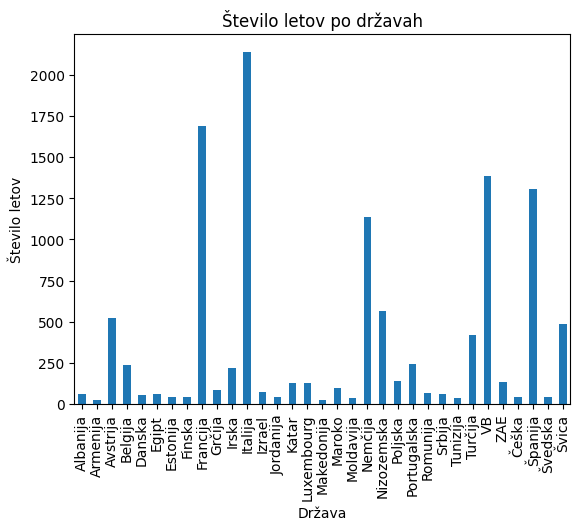

In [128]:


po_drzavah.plot(kind='bar')
plt.xlabel('Država')
plt.ylabel('Število letov')
plt.title('Število letov po državah')
plt.show()

## Število letov po dnevih v tednu iz Marca Pola
Z analizo povprečnega števila letov na dan sem želela preveriti hipotezo, da je največ letov v soboto. Iz spodnjih povprečij vidimo, da je bilo največ letov opravljenih v petek (1.945) in nedeljo (1.832), najmanj pa v sredo (1.347) in torek (1.561). Hipotezo, da je največ letov v soboto, tako lahko ovržemo, saj je bilo več letov kot v soboto opravljenih v petek, nedeljo, ponedeljek in četrtek. 


In [129]:
zdruzeni_benetke.groupby("dan").size().sort_values(ascending=False)

dan
PET    1965
NED    1832
PON    1791
CET    1682
SOB    1602
TOR    1561
SRE    1347
dtype: int64

## Primerjava števila letov po dnevih iz Bergama in Benetk
Iz spodnjega prikaza lahko vidimo, kateri dan je bila razlika v številu letov z obeh letališč največja. Petek je bil dan, ko je bilo v opazovanem obdobju opravljeno največ letov iz obeh letališč, hkrati pa je bila tudi razlika največja. Tudi v tem primeru lahko hipotezo, da je bila največja razlika v soboto, ovržemo.

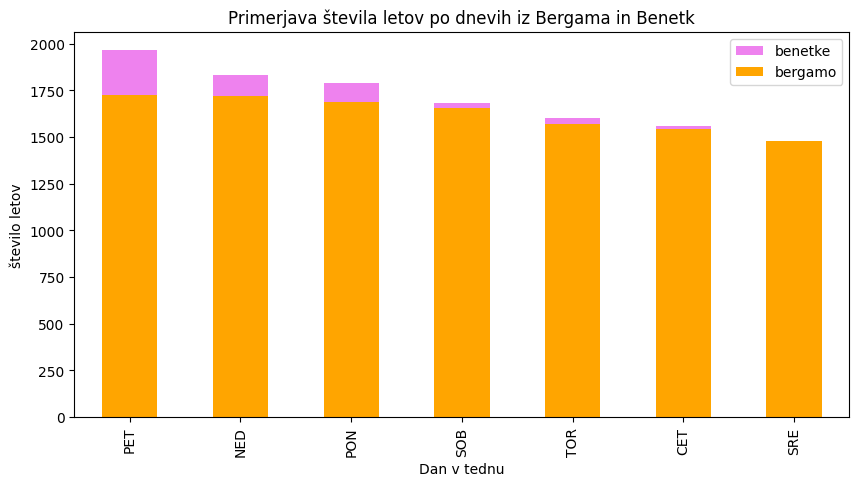

In [130]:
ax = zdruzeni_benetke.groupby("dan").size().sort_values(ascending=False).plot(kind='bar', color='violet', figsize=(10, 5))
zdruzeni_bergamo.groupby("dan").size().sort_values(ascending=False).plot(kind='bar', color='orange', ax=ax)
plt.xlabel('Dan v tednu')
plt.ylabel('število letov')
plt.title('Primerjava števila letov po dnevih iz Bergama in Benetk')
plt.legend(['benetke', 'bergamo'])
plt.show()

## Nizkocenovna letalska družba Ryanair predstavlja več kot polovico vseh letov iz Bergama
Ker je Bergamo glavna baza Ryanaira v severni Italiji, sem postavila hipotezo, da Ryanair predstavlja več kot polovico vseh letov iz omenjenega letališča. Iz spodnjega izračuna je razvidno, da Ryanair predstavlja 76,4 % vseh letov, zato se hipotezo lahko potrdi.

In [131]:
bergamo_z_letalskimi_druzbami = pd.merge(zdruzeni_bergamo, letalske_druzbe, on='id')
bergamo_z_letalskimi_druzbami

,id,destinacija,datum,dan,cas,teden,Airport,Država,druzba,letalo
0,b1,Agadir,2022-11-01,TOR,2:40,44,Bergamo,Maroko,Ryanair,FR 3504
1,b2,Agadir,2022-11-05,SOB,2:40,44,Bergamo,Maroko,Ryanair,FR 3504
2,b3,Agadir,2022-11-08,TOR,2:40,45,Bergamo,Maroko,Ryanair,FR 3504
3,b4,Agadir,2022-11-12,SOB,3:40,45,Bergamo,Maroko,Ryanair,FR 3504
4,b5,Agadir,2022-11-15,TOR,3:40,46,Bergamo,Maroko,Ryanair,FR 3504
...,...,...,...,...,...,...,...,...,...,...
11367,b11368,Zaragoza,2023-03-20,PON,1:55,12,Bergamo,Španija,Ryanair,FR 3502
11368,b11369,Zaragoza,2023-03-24,PET,1:55,12,Bergamo,Španija,Ryanair,FR 3502
11369,b11370,Zaragoza,2023-03-26,NED,1:50,12,Bergamo,Španija,Ryanair,FR 3502
11370,b11371,Zaragoza,2023-03-28,TOR,1:50,13,Bergamo,Španija,Ryanair,FR 3502


In [132]:
po_druzbah = bergamo_z_letalskimi_druzbami.groupby("druzba")
ryanair =  po_druzbah.get_group("Ryanair")
vsi= bergamo_z_letalskimi_druzbami.shape[0]
kol_ryanair = ryanair.shape[0]
kol_ryanair

8699

In [133]:
kol_ryanair / vsi

0.7649489975378122

## Največ letov iz obeh letališč je v eno od italijanskih letališč
Hipotezo, da je največ letov v eno od italijanskih letališč, lahko ovržemo, saj je prvo italijansko letališče šele na četrtem mestu. To je razvidno iz spodnje tabele, ki prikazuje skupno število letov iz obeh letališč po destinacijah v obdobju od novembra 2022 do marca 2023. Kjub temu, da notranji leti predstavljajo navječji delež vseh letov, je bilo največ letov na Pariško letališče Charles de Gaulle, kateremu sta sledili še letališči v Madridu in Amsterdamu. Prva italijanska destinacija je bila Catania, ki je šele na četrtem mestu. Kot vidimo, je bilo najmanj letov opravljenih v poletne destinacije kot so Rodos, Ibiza, Krf. V kolikor bi spremenili obdobje opazovanja na poletne mesece, bi bilo število letov v te tipične poletne sredozemske destinacije gotovo večje.

In [134]:
skupna_tabela = pd.concat([zdruzeni_benetke, zdruzeni_bergamo], axis=0)

In [135]:
skupna_tabela

,id,destinacija,datum,dan,cas,teden,Airport,Država
0,v1,Amman,2022-11-02,SRE,5:10,44,Benetke,Jordanija
1,v2,Amman,2022-11-09,SRE,5:10,45,Benetke,Jordanija
2,v3,Amman,2022-11-16,SRE,5:10,46,Benetke,Jordanija
3,v4,Amman,2022-11-23,SRE,5:10,47,Benetke,Jordanija
4,v5,Amman,2022-11-30,SRE,5:10,48,Benetke,Jordanija
...,...,...,...,...,...,...,...,...
11367,b11368,Zaragoza,2023-03-20,PON,1:55,12,Bergamo,Španija
11368,b11369,Zaragoza,2023-03-24,PET,1:55,12,Bergamo,Španija
11369,b11370,Zaragoza,2023-03-26,NED,1:50,12,Bergamo,Španija
11370,b11371,Zaragoza,2023-03-28,TOR,1:50,13,Bergamo,Španija


In [136]:
po_destinacijah =skupna_tabela.groupby("destinacija").size().sort_values(ascending=False)
najvec = po_destinacijah.head(20)
najvec


destinacija
Paris Charles de Gaulle    873
Madrid                     691
Amsterdam                  658
Catania                    626
Naples                     616
Frankfurt                  610
London Stansted            579
Barcelona                  569
Vienna                     523
Palermo                    517
Bari                       454
Istanbul                   442
Rome Fiumicino             424
London Heathrow            424
Zurich                     403
Paris Orly                 400
Istanbul Airport           365
Munich                     356
London Gatwick             338
Dublin                     327
dtype: int64

In [137]:
najmanj= po_destinacijah.tail(20)
najmanj

destinacija
Tunisi             39
Saragozza          39
Oslo Gardemoen     38
Chisinau           38
Bournemouth        29
Olbia              27
Skopje             25
Bilbao             24
Erevan             22
Alessandria        20
Lille              15
Bordeaux           14
Sharm El Sheikh    13
Hannover            8
Corfu'              6
Ibiza               6
Billund             5
Rhodes              4
Dakar               3
Stoccarda           1
dtype: int64

In [138]:
sk = skupna_tabela.groupby("destinacija")

In [139]:
sk = sk[["destinacija"]]

In [140]:
grouped = skupna_tabela.groupby("Država")

uredi= grouped.size().sort_values(ascending=False).head(10)

italija = grouped.get_group("Italija")
norveška = grouped.get_group("Norveška")
norveška
z_eno_dest = []
for name, group in grouped:
    if group["destinacija"].nunique() == 1:
        z_eno_dest.append(group)

države_z_eno_dest = pd.concat(z_eno_dest)

države_z_eno_dest

,id,destinacija,datum,dan,cas,teden,Airport,Država
10653,v10654,Tirana,2022-11-01,TOR,1:25,44,Benetke,Albanija
10654,v10655,Tirana,2022-11-04,PET,1:25,44,Benetke,Albanija
10655,v10656,Tirana,2022-11-07,PON,1:25,45,Benetke,Albanija
10656,v10657,Tirana,2022-11-08,TOR,1:25,45,Benetke,Albanija
10657,v10658,Tirana,2022-11-11,PET,1:25,45,Benetke,Albanija
...,...,...,...,...,...,...,...,...
8445,b8446,Prague,2023-03-27,PON,1:25,13,Bergamo,Češka
8446,b8447,Prague,2023-03-28,TOR,1:25,13,Bergamo,Češka
8447,b8448,Prague,2023-03-29,SRE,1:25,13,Bergamo,Češka
8448,b8449,Prague,2023-03-30,CET,1:25,13,Bergamo,Češka


## Povezava s severnoameriškimi letališči
Podatki po državah iz obeh letališč pokažejo, da je bilo največ letov znotraj države (Italije), sledile so Španija, Francija in Velika Britanija. V opazovanem obdobju pa ni bilo direktnih povezav s severnoameriškimi letališči. Zato lahko hipotezo, da imajo Benetke večje šetevilo povezav s Severno Ameriko, ovržemo. 

In [141]:
uredi

Država
Italija        3948
Španija        2754
Francija       2164
VB             2033
Nemčija        1623
Romunija       1174
Turčija         862
Nizozemska      861
Poljska         853
Portugalska     689
dtype: int64

In [142]:
italija.groupby("destinacija").size().sort_values(ascending=False).head(20)

destinacija
Catania           626
Naples            616
Palermo           517
Bari              454
Rome Fiumicino    424
Cagliari          291
Brindisi          150
Lamezia Terme     150
Trapani           150
Pescara           144
Alghero           132
Crotone           111
Roma Fiumicino    109
Comiso             47
Olbia              27
dtype: int64

In [143]:
matchy_rows = zdruzeni_benetke[zdruzeni_benetke["destinacija"].isin(zdruzeni_bergamo["destinacija"])]

## Število povezav s posameznega letališča
V spodnji tabeli so razvidne vse destinacije, ki so dosegljive iz obeh letališč. Bergamo je bil povezan v več destinacijami (114) kot Benetke (76).

In [144]:
matchy = matchy_rows.drop_duplicates(subset="destinacija")
matchy[["destinacija","Država"]]

,destinacija,Država
0,Amman,Jordanija
41,Amsterdam,Nizozemska
609,Athens,Grčija
1262,Bari,Italija
1776,Birmingham,VB
1867,Bristol,VB
2133,Cagliari,Italija
2274,Casablanca,Maroko
2370,Catania,Italija
2824,Cluj,Romunija


In [145]:
vse_dest_iz_bergama = podatki_bergamo.groupby("destinacija").size()
vse_dest_iz_bergama.shape[0]

114

In [146]:
vse_dest_iz_venezie = podatki_venezia.groupby("destinacija").size()
vse_dest_iz_venezie.shape[0]

76

## Vpliv svetovnega nogometnega prvenstva v Katarju na število letov

Ker se Italija ni uvrstila na svetovno nogometno prvenstvo, ki je potekalo v času od 20.novembra do 18.decembra 2022, ni bilo vidnega vpliva na število letov v Katar, saj je bilo bilo v povprečju sedem letov na teden, v enem tednu jih je bilo pa celo samo šest. 

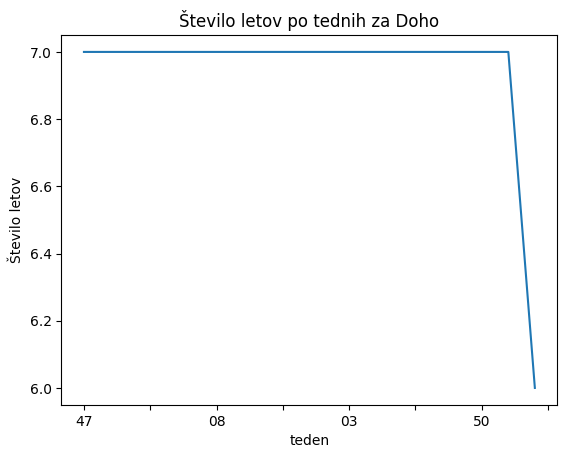

In [147]:
sk=skupna_tabela.groupby("destinacija")
doha= sk.get_group("Doha")
doha_filtered = doha[doha["teden"]!= "46"]#ta teden ni cel
frequency = doha_filtered['teden'].value_counts()
frequency.plot(kind='line')
plt.xlabel('teden')
plt.ylabel('Število letov')
plt.title('Število letov po tednih za Doho')
plt.show()

Valentina Maček, februar 2023